In [103]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PolynomialFeatures
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn import set_config
set_config(display="diagram")
from sklearn.naive_bayes import ComplementNB
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, roc_auc_score,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_roc_curve, auc,roc_curve,roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.impute import SimpleImputer


In [35]:
df = pd.read_csv('/Users/mahmoud/Car_Price_Prediction/merged_official_data.csv')

In [36]:
df = df.drop(columns=['Unnamed: 0'])
df

,Car Name,Car Rating,Reviews,Year,Mileage,Dealer Name,Dealer Rating,Review Count,Price
0,2013 Nissan Xterra PRO-4X,4.5,"['March 15, 2021\nBy Tony from Detroit\nOwns t...",2013,163000.0,Priced Right Auto,0.0,19.0,9500.0
1,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,95747.0,Blasius Pre-Owned Auto,4.4,75.0,8994.0
2,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,159177.0,Metro Motors LLC,0.0,1.0,8900.0
3,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,79055.0,Oakbrook Toyota in Westmont,4.5,2527.0,10304.0
4,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,102894.0,Sawari Automotive Group,4.7,31.0,9599.0
...,...,...,...,...,...,...,...,...,...
13691,2005 Dodge Ram 1500 SLT/Laramie Quad Cab,5.0,"['May 8, 2023\nBy Michael from Nashville \nO...",2005,171430.0,Broadway Auto Mall,0.0,16.0,5980.0
13692,2005 Dodge Ram 1500 SLT/Laramie Quad Cab,5.0,"['May 8, 2023\nBy Michael from Nashville \nO...",2005,153560.0,Trucks Plus Idaho,0.0,2.0,9988.0
13693,2014 Audi A4 Premium Plus,4.4,"['September 7, 2022\nBy SInce59 from Napa, Ca...",2014,138173.0,Your Choice Auto Sales of Elgin,4.4,57.0,12999.0
13694,2011 BMW 535 xDrive,4.5,"['June 2, 2022\nBy Manuel from Liberal Ks\nOw...",2011,146541.0,Best Choice Auto Sales,0.0,37.0,9990.0


In [37]:
# Going from all the info of the car in 'Name' seperate them and create new columns
df[['Year', 'Make', 'Model', 'Type']] = df['Car Name'].str.extract(r'(\d{4})\s+([^ ]+)\s+([^ ]+)\s+(.*)')
df

,Car Name,Car Rating,Reviews,Year,Mileage,Dealer Name,Dealer Rating,Review Count,Price,Make,Model,Type
0,2013 Nissan Xterra PRO-4X,4.5,"['March 15, 2021\nBy Tony from Detroit\nOwns t...",2013,163000.0,Priced Right Auto,0.0,19.0,9500.0,Nissan,Xterra,PRO-4X
1,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,95747.0,Blasius Pre-Owned Auto,4.4,75.0,8994.0,Hyundai,Elantra,SE
2,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,159177.0,Metro Motors LLC,0.0,1.0,8900.0,Hyundai,Elantra,SE
3,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,79055.0,Oakbrook Toyota in Westmont,4.5,2527.0,10304.0,Hyundai,Elantra,SE
4,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,102894.0,Sawari Automotive Group,4.7,31.0,9599.0,Hyundai,Elantra,SE
...,...,...,...,...,...,...,...,...,...,...,...,...
13691,2005 Dodge Ram 1500 SLT/Laramie Quad Cab,5.0,"['May 8, 2023\nBy Michael from Nashville \nO...",2005,171430.0,Broadway Auto Mall,0.0,16.0,5980.0,Dodge,Ram,1500 SLT/Laramie Quad Cab
13692,2005 Dodge Ram 1500 SLT/Laramie Quad Cab,5.0,"['May 8, 2023\nBy Michael from Nashville \nO...",2005,153560.0,Trucks Plus Idaho,0.0,2.0,9988.0,Dodge,Ram,1500 SLT/Laramie Quad Cab
13693,2014 Audi A4 Premium Plus,4.4,"['September 7, 2022\nBy SInce59 from Napa, Ca...",2014,138173.0,Your Choice Auto Sales of Elgin,4.4,57.0,12999.0,Audi,A4,Premium Plus
13694,2011 BMW 535 xDrive,4.5,"['June 2, 2022\nBy Manuel from Liberal Ks\nOw...",2011,146541.0,Best Choice Auto Sales,0.0,37.0,9990.0,BMW,535,xDrive


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13696 entries, 0 to 13695
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car Name       13696 non-null  object 
 1   Car Rating     13696 non-null  float64
 2   Reviews        13696 non-null  object 
 3   Year           13696 non-null  object 
 4   Mileage        13696 non-null  float64
 5   Dealer Name    13696 non-null  object 
 6   Dealer Rating  13696 non-null  float64
 7   Review Count   13696 non-null  float64
 8   Price          13696 non-null  float64
 9   Make           13696 non-null  object 
 10  Model          13696 non-null  object 
 11  Type           13696 non-null  object 
dtypes: float64(5), object(7)
memory usage: 1.3+ MB


In [38]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_norm = X.apply(self.process_doc)
        return X_norm

    def process_doc(self, doc):
        def pos_tagger(nltk_tag):
            if nltk_tag.startswith('J'):
                return wordnet.ADJ
            elif nltk_tag.startswith('V'):
                return wordnet.VERB
            elif nltk_tag.startswith('N'):
                return wordnet.NOUN
            elif nltk_tag.startswith('R'):
                return wordnet.ADV
            else:
                return None
            
        # remove stop words and punctuations, then lower case
        doc_norm = [tok.lower() for tok in word_tokenize(doc) if tok.isalpha() and tok.lower() not in self.stop_words]
        
        #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
        
        # creates list of tuples with tokens and POS tags in wordnet format
        wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc_norm)))
        doc_norm = [self.wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]
        return " ".join(doc_norm)

In [39]:
nlp_preprocessor = TextPreprocessor()
df['Processed_Reviews'] = nlp_preprocessor.transform(df['Reviews'])
df

,Car Name,Car Rating,Reviews,Year,Mileage,Dealer Name,Dealer Rating,Review Count,Price,Make,Model,Type,Processed_Reviews
0,2013 Nissan Xterra PRO-4X,4.5,"['March 15, 2021\nBy Tony from Detroit\nOwns t...",2013,163000.0,Priced Right Auto,0.0,19.0,9500.0,Nissan,Xterra,PRO-4X,tony car love xterra car look amazing drive am...
1,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,95747.0,Blasius Pre-Owned Auto,4.4,75.0,8994.0,Hyundai,Elantra,SE,talessa tulsa car buy car use say best car eve...
2,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,159177.0,Metro Motors LLC,0.0,1.0,8900.0,Hyundai,Elantra,SE,talessa tulsa car buy car use say best car eve...
3,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,79055.0,Oakbrook Toyota in Westmont,4.5,2527.0,10304.0,Hyundai,Elantra,SE,talessa tulsa car buy car use say best car eve...
4,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,102894.0,Sawari Automotive Group,4.7,31.0,9599.0,Hyundai,Elantra,SE,talessa tulsa car buy car use say best car eve...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13691,2005 Dodge Ram 1500 SLT/Laramie Quad Cab,5.0,"['May 8, 2023\nBy Michael from Nashville \nO...",2005,171430.0,Broadway Auto Mall,0.0,16.0,5980.0,Dodge,Ram,1500 SLT/Laramie Quad Cab,michael nashville car hemi love growl hit gas ...
13692,2005 Dodge Ram 1500 SLT/Laramie Quad Cab,5.0,"['May 8, 2023\nBy Michael from Nashville \nO...",2005,153560.0,Trucks Plus Idaho,0.0,2.0,9988.0,Dodge,Ram,1500 SLT/Laramie Quad Cab,michael nashville car hemi love growl hit gas ...
13693,2014 Audi A4 Premium Plus,4.4,"['September 7, 2022\nBy SInce59 from Napa, Ca...",2014,138173.0,Your Choice Auto Sales of Elgin,4.4,57.0,12999.0,Audi,A4,Premium Plus,napa car read review bit flummoxed comment gre...
13694,2011 BMW 535 xDrive,4.5,"['June 2, 2022\nBy Manuel from Liberal Ks\nOw...",2011,146541.0,Best Choice Auto Sales,0.0,37.0,9990.0,BMW,535,xDrive,manuel liberal car minor repair vehicle year m...


In [11]:
# one hot encode 
categorical_features = ['Make', 'Model', 'Type']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df_encoded

,Car Name,Car Rating,Reviews,Year,Mileage,Dealer Name,Dealer Rating,Review Count,Price,Processed_Reviews,...,Type_xDrive 35i,Type_xDrive 35i Sport Activity,Type_xDrive28i,Type_xDrive30i,Type_xDrive35d,Type_xDrive35i,Type_xDrive35i Premium,Type_xDrive48i,Type_xDrive50i,Type_xi
0,2013 Nissan Xterra PRO-4X,4.5,"['March 15, 2021\nBy Tony from Detroit\nOwns t...",2013,163000.0,Priced Right Auto,0.0,19.0,9500.0,tony car love xterra car look amazing drive am...,...,0,0,0,0,0,0,0,0,0,0
1,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,95747.0,Blasius Pre-Owned Auto,4.4,75.0,8994.0,talessa tulsa car buy car use say best car eve...,...,0,0,0,0,0,0,0,0,0,0
2,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,159177.0,Metro Motors LLC,0.0,1.0,8900.0,talessa tulsa car buy car use say best car eve...,...,0,0,0,0,0,0,0,0,0,0
3,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,79055.0,Oakbrook Toyota in Westmont,4.5,2527.0,10304.0,talessa tulsa car buy car use say best car eve...,...,0,0,0,0,0,0,0,0,0,0
4,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,102894.0,Sawari Automotive Group,4.7,31.0,9599.0,talessa tulsa car buy car use say best car eve...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13691,2005 Dodge Ram 1500 SLT/Laramie Quad Cab,5.0,"['May 8, 2023\nBy Michael from Nashville \nO...",2005,171430.0,Broadway Auto Mall,0.0,16.0,5980.0,michael nashville car hemi love growl hit gas ...,...,0,0,0,0,0,0,0,0,0,0
13692,2005 Dodge Ram 1500 SLT/Laramie Quad Cab,5.0,"['May 8, 2023\nBy Michael from Nashville \nO...",2005,153560.0,Trucks Plus Idaho,0.0,2.0,9988.0,michael nashville car hemi love growl hit gas ...,...,0,0,0,0,0,0,0,0,0,0
13693,2014 Audi A4 Premium Plus,4.4,"['September 7, 2022\nBy SInce59 from Napa, Ca...",2014,138173.0,Your Choice Auto Sales of Elgin,4.4,57.0,12999.0,napa car read review bit flummoxed comment gre...,...,0,0,0,0,0,0,0,0,0,0
13694,2011 BMW 535 xDrive,4.5,"['June 2, 2022\nBy Manuel from Liberal Ks\nOw...",2011,146541.0,Best Choice Auto Sales,0.0,37.0,9990.0,manuel liberal car minor repair vehicle year m...,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Create Age column
df['Year'] = pd.to_numeric(df['Year'])
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Year']
df

,Car Name,Car Rating,Reviews,Year,Mileage,Dealer Name,Dealer Rating,Review Count,Price,Make,Model,Type,Processed_Reviews,Age
0,2013 Nissan Xterra PRO-4X,4.5,"['March 15, 2021\nBy Tony from Detroit\nOwns t...",2013,163000.0,Priced Right Auto,0.0,19.0,9500.0,Nissan,Xterra,PRO-4X,tony car love xterra car look amazing drive am...,10
1,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,95747.0,Blasius Pre-Owned Auto,4.4,75.0,8994.0,Hyundai,Elantra,SE,talessa tulsa car buy car use say best car eve...,9
2,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,159177.0,Metro Motors LLC,0.0,1.0,8900.0,Hyundai,Elantra,SE,talessa tulsa car buy car use say best car eve...,9
3,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,79055.0,Oakbrook Toyota in Westmont,4.5,2527.0,10304.0,Hyundai,Elantra,SE,talessa tulsa car buy car use say best car eve...,9
4,2014 Hyundai Elantra SE,4.5,"['May 7, 2022\nBy Talessa from Tulsa, ok\nOwn...",2014,102894.0,Sawari Automotive Group,4.7,31.0,9599.0,Hyundai,Elantra,SE,talessa tulsa car buy car use say best car eve...,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13691,2005 Dodge Ram 1500 SLT/Laramie Quad Cab,5.0,"['May 8, 2023\nBy Michael from Nashville \nO...",2005,171430.0,Broadway Auto Mall,0.0,16.0,5980.0,Dodge,Ram,1500 SLT/Laramie Quad Cab,michael nashville car hemi love growl hit gas ...,18
13692,2005 Dodge Ram 1500 SLT/Laramie Quad Cab,5.0,"['May 8, 2023\nBy Michael from Nashville \nO...",2005,153560.0,Trucks Plus Idaho,0.0,2.0,9988.0,Dodge,Ram,1500 SLT/Laramie Quad Cab,michael nashville car hemi love growl hit gas ...,18
13693,2014 Audi A4 Premium Plus,4.4,"['September 7, 2022\nBy SInce59 from Napa, Ca...",2014,138173.0,Your Choice Auto Sales of Elgin,4.4,57.0,12999.0,Audi,A4,Premium Plus,napa car read review bit flummoxed comment gre...,9
13694,2011 BMW 535 xDrive,4.5,"['June 2, 2022\nBy Manuel from Liberal Ks\nOw...",2011,146541.0,Best Choice Auto Sales,0.0,37.0,9990.0,BMW,535,xDrive,manuel liberal car minor repair vehicle year m...,12


# Modeling

In [45]:
X = df.drop(['Price'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
text_cols = ['Reviews']
num_cols = ['Car Rating', 'Mileage', 'Dealer Rating', 'Review Count']
cat_cols = ['Make', 'Model', 'Type']

text_pipeline = Pipeline([
    ('text_preprocessor', TextPreprocessor()),
    ('tfidf', TfidfVectorizer())
])

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('text', text_pipeline, 'Reviews'),
    ('numerical', num_pipeline, num_cols),
    ('categorical', cat_pipeline, cat_cols)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])


In [47]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("R_Squared:", r2)
print("Root Mean Squared Error:", rmse)

R_Squared: 0.7412093314543227
Root Mean Squared Error: 1322.6753925347284


In [112]:
b = pd.DataFrame(preprocessor.fit_transform(X_train).todense())

,0,1,2,3,4,5,6,7,8,9,...,14785,14786,14787,14788,14789,14790,14791,14792,14793,14794
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# XGBoost

In [97]:
X = df.drop(['Price'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
text_cols = ['Reviews']
num_cols = ['Car Rating', 'Mileage', 'Dealer Rating', 'Review Count']
cat_cols = ['Make', 'Model', 'Type']

text_pipeline = Pipeline([
    ('text_preprocessor', TextPreprocessor()),
    ('tfidf', TfidfVectorizer())
])

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('text', text_pipeline, 'Reviews'),
    ('numerical', num_pipeline, num_cols),
    ('categorical', cat_pipeline, cat_cols)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])


In [100]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("R_Squared:", r2)
print("Root Mean Squared Error:", rmse)

R_Squared: 0.6437223619600433
Root Mean Squared Error: 1551.9340072470734


<AxesSubplot:xlabel='Price'>

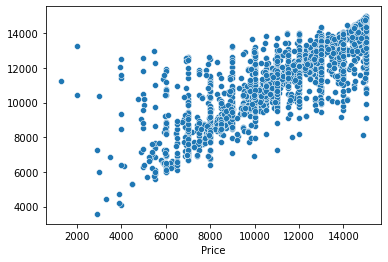

In [113]:
import seaborn as sns
sns.scatterplot(x = y_test, y = y_pred)